In [109]:
import pandas as pd
import numpy as np
from osgeo import gdal
import glob
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
#definidimos la carpeta en que estan los datos
os.chdir(r"F:\UNAM\Doctorado\SIG\Clima\Precipitacion")

In [68]:
dt=pd.read_csv("9048P.txt",sep = ",", engine='python')
dt['Fecha'] = pd.to_datetime(dt['Fecha'])

df=pd.read_csv("9048P.txt",sep = ",", engine='python')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.index=df["Fecha"]
df.drop("Fecha",axis=1, inplace=True)

In [97]:
t_1=pd.read_csv(r"F:\UNAM\Doctorado\SIG\Clima\Temperatura\13082T.txt",sep = ",", engine='python')
t_1['Fecha'] = pd.to_datetime(t_1['Fecha'])
t_1.index=t_1["Fecha"]
t_1.drop("Fecha",axis=1, inplace=True)
t_1M=t_1.resample(rule='M').mean()
t_1Y=t_1.resample(rule='Y').mean()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


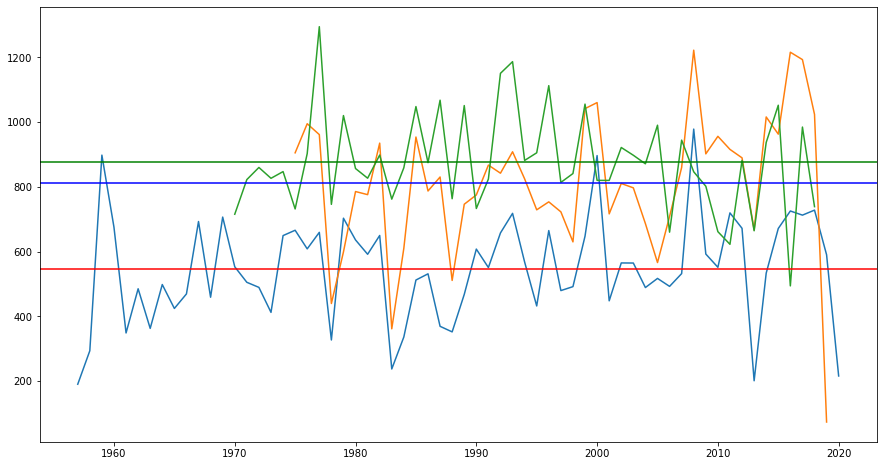

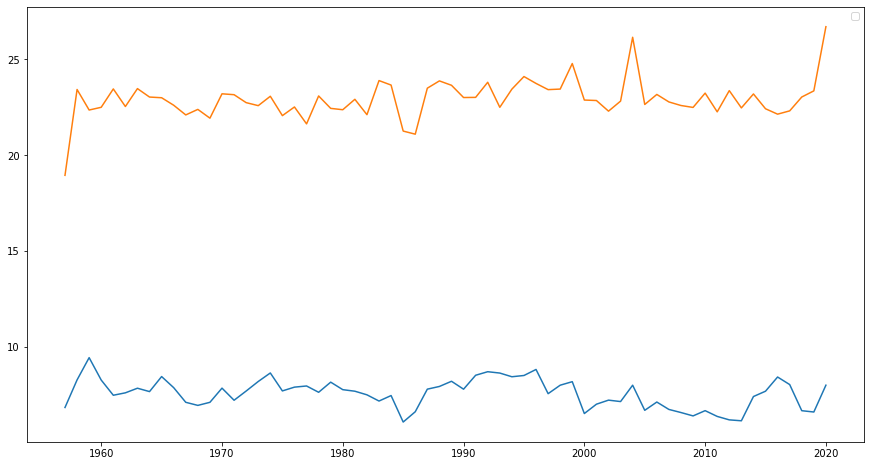

In [123]:
d_1=pd.read_csv("13082P.txt",sep = ",", engine='python')
d_1['Fecha'] = pd.to_datetime(d_1['Fecha'])
d_1.index=d_1["Fecha"]
d_1.drop("Fecha",axis=1, inplace=True)
d_1M=d_1.resample(rule='M').sum()
d_1Y=d_1.resample(rule='Y').sum()

d_2=pd.read_csv("13098P.txt",sep = ",", engine='python')
d_2['Fecha'] = pd.to_datetime(d_2['Fecha'])
d_2.index=d_2["Fecha"]
d_2.drop("Fecha",axis=1, inplace=True)
d_2M=d_2.resample(rule='M').sum()
d_2Y=d_2.resample(rule='Y').sum()

d_3=pd.read_csv("15058P.txt",sep = ",", engine='python')
d_3['Fecha'] = pd.to_datetime(d_3['Fecha'])
d_3.index=d_3["Fecha"]
d_3.drop("Fecha",axis=1, inplace=True)
d_3M=d_3.resample(rule='M').sum()
d_3Y=d_3.resample(rule='Y').sum()


mediad_1Y=d_1Y["P(mm)"].mean()
mediad_2Y=d_2Y["P(mm)"].mean()
mediad_3Y=d_3Y["P(mm)"].mean()
plt.figure(figsize=(15,8))

plt.plot(d_1Y.index,d_1Y["P(mm)"],label="afuera")
plt.plot(d_2Y.index,d_2Y["P(mm)"])
plt.plot(d_3Y.index,d_3Y["P(mm)"])


plt.axhline(y=mediad_1Y, color='r', linestyle='-')
plt.axhline(y=mediad_2Y, color='b', linestyle='-')
plt.axhline(y=mediad_3Y, color='g', linestyle='-')

plt.figure(figsize=(15,8))
plt.plot(t_1Y.index,t_1Y["Tmn(°C)"])
plt.plot(t_1Y.index,t_1Y["Tmx(°C)"])
plt.legend()



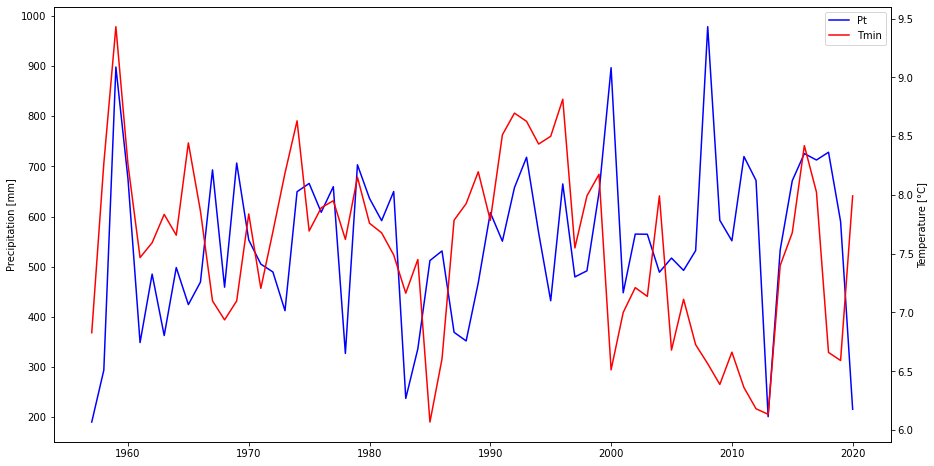

In [147]:
fig=plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

xticks = pd.to_datetime(d_1Y.index.tolist(), format='%B').sort_values() # must work for both axes
ax1.plot(xticks, d_1Y["P(mm)"], color='blue',label='Pt')
ax2.plot(xticks, t_1Y["Tmn(°C)"], color='red',label='Tmin')


#plt.xticks(pd.to_datetime(d_1Y.index.tolist(), format='%B').sort_values()) # to show all ticks

#ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b")) # must be called after plotting both axes
#plt.legend(loc='best', facecolor='w', fontsize=16)
ax1.set_ylabel('Precipitation [mm]', fontsize=10)
ax2.set_ylabel('Temperature [°C]', fontsize=10)

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

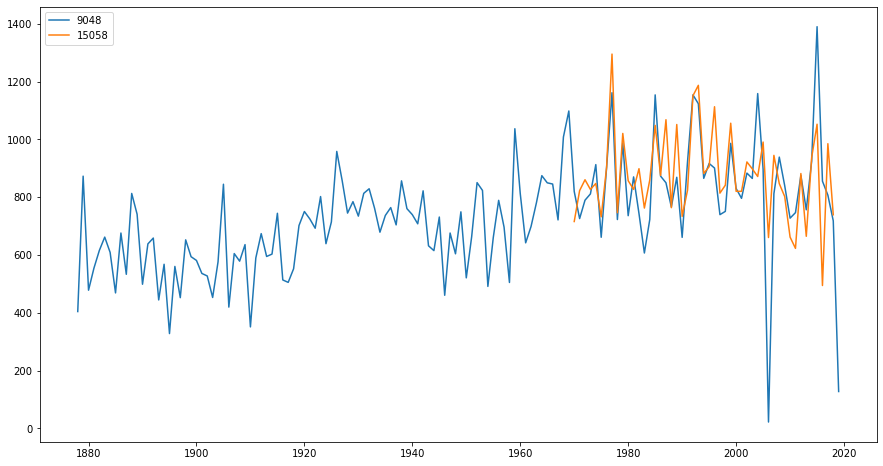

In [150]:
#df1=df.resample(rule='M').sum()
df2=df.resample(rule='Y').sum()
#Pm=df1.iloc[0:360,:]
#Sc=df1.iloc[360:720,:]
#Tc=df1.iloc[720:1080,:]
#Ct=df1.iloc[1080:1440,:]
#Qt=df1.iloc[1440:,]

plt.figure(figsize=(15,8))
plt.plot(df2.index,df2["P(mm)"],label='9048')
#plt.plot(d_1Y.index,d_1Y["P(mm)"],label='13082')
#plt.plot(d_2Y.index,d_2Y["P(mm)"],label='13098')
plt.plot(d_3Y.index,d_3Y["P(mm)"],label='15058')

plt.legend()

In [66]:
#como graficar precipitación cada 30 años
plt.figure(figsize=(15,8))
#plt.plot(Pm.index,Pm["P(mm)"])
#plt.plot(Sc.index,Sc["P(mm)"])
#plt.plot(Tc.index,Tc["P(mm)"])
#plt.plot(Ct.index,Ct["P(mm)"])
#plt.plot(Qt.index,Qt["P(mm)"])


<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

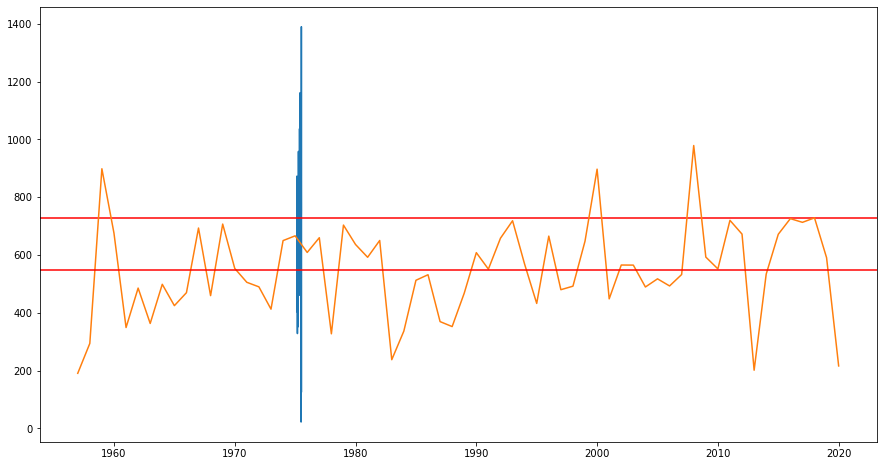

In [82]:
dt_sum = dt.groupby([ dt['Fecha'].dt.year], sort=False).sum()  # get sum for each individual month
dt_sum.index.rename('year', inplace=True)  # just renaming the index

plt.figure(figsize=(15,8))
plt.plot(dt_sum.index,dt_sum['P(mm)'])
plt.axhline(y=media, color='r', linestyle='-')

plt.plot(d_1Y.index,d_1Y["P(mm)"])
plt.axhline(y=mediad_1Y, color='r', linestyle='-')

In [77]:
media=dt_sum['P(mm)'].mean()
media

728.6274647887325

In [34]:
dt_sum = df2.groupby([df2['Fecha'].dt.month_name(), df2['Fecha'].dt.year], sort=False).mean()  # get sum for each individual month
dt_sum.index.rename(['month','year'], inplace=True)  # just renaming the index
dt_sum.reset_index(level=0, inplace=True)  # make the month-index to a column
tempPm = dt_sum.groupby([dt_sum['month']], sort=False).mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tempPm = tempPm.reindex(new_order, axis=0)


KeyError: 'Fecha'

In [113]:
dt_sum = Sc.groupby([Sc['Fecha'].dt.month_name(), Sc['Fecha'].dt.year], sort=False).mean()  # get sum for each individual month
dt_sum.index.rename(['month','year'], inplace=True)  # just renaming the index
dt_sum.reset_index(level=0, inplace=True)  # make the month-index to a column
tempSc = dt_sum.groupby([dt_sum['month']], sort=False).mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tempSc = tempSc.reindex(new_order, axis=0)

In [114]:
dt_sum = Tc.groupby([Tc['Fecha'].dt.month_name(), Tc['Fecha'].dt.year], sort=False).mean()  # get sum for each individual month
dt_sum.index.rename(['month','year'], inplace=True)  # just renaming the index
dt_sum.reset_index(level=0, inplace=True)  # make the month-index to a column
tempTc = dt_sum.groupby([dt_sum['month']], sort=False).mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tempTc = tempTc.reindex(new_order, axis=0)

In [115]:
dt_sum = Ct.groupby([Ct['Fecha'].dt.month_name(), Ct['Fecha'].dt.year], sort=False).mean()  # get sum for each individual month
dt_sum.index.rename(['month','year'], inplace=True)  # just renaming the index
dt_sum.reset_index(level=0, inplace=True)  # make the month-index to a column
tempCt = dt_sum.groupby([dt_sum['month']], sort=False).mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tempCt = tempCt.reindex(new_order, axis=0)

In [119]:
dt_sum = Qt.groupby([Qt['Fecha'].dt.month_name(), Qt['Fecha'].dt.year], sort=False).mean()  # get sum for each individual month
dt_sum.index.rename(['month','year'], inplace=True)  # just renaming the index
dt_sum.reset_index(level=0, inplace=True)  # make the month-index to a column
tempQt = dt_sum.groupby([dt_sum['month']], sort=False).mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tempQt = tempQt.reindex(new_order, axis=0)

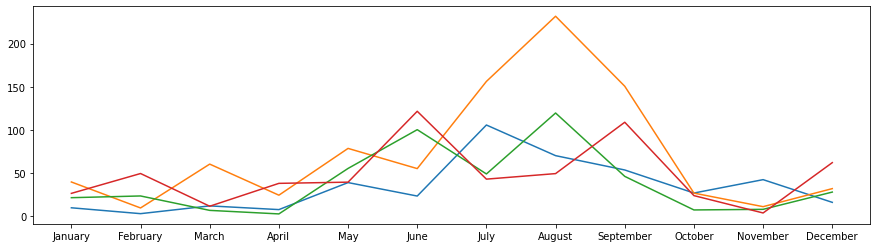

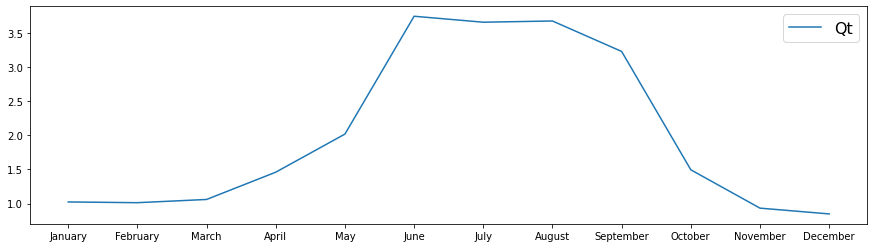

In [122]:
plt.figure(figsize=(15,4))
plt.plot(tempPm.index,tempPm["P(mm)"], label="Pm")
#plt.figure(figsize=(15,4))
plt.plot(tempSc.index,tempSc["P(mm)"], label="Sc")
#plt.figure(figsize=(15,4))
plt.plot(tempTc.index,tempTc["P(mm)"], label="Tc")
#plt.figure(figsize=(15,4))
plt.plot(tempCt.index,tempCt["P(mm)"], label="Ct")
plt.figure(figsize=(15,4))
plt.plot(tempQt.index,tempQt["P(mm)"], label="Qt")

plt.legend(loc='best', facecolor='w', fontsize=16)
plt.show()

In [91]:
tempSc

,P(mm)
month,
January,19.85
February,4.80
March,30.20
April,12.20
May,39.30
June,27.60
July,78.10
August,115.85
September,75.30
